### <center> Проектная работа по модулю “Математика и статистика в Python”.

In [10]:
import pandas as pd
from scipy import stats
import numpy as np
%pylab inline
%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 12,6


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### **1. Загрузить файл hr.csv.**

In [2]:
hr = pd.read_csv('data/HR.csv')

In [3]:
hr.shape

(14999, 10)

In [4]:
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### **2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

Рассчитаем основные статистики с помощью функции pandas describe(). Моду найдем с помощью функции mode().

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### **3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

Для этого возпользуемся функцией corr().

In [8]:
corr = hr.corr()

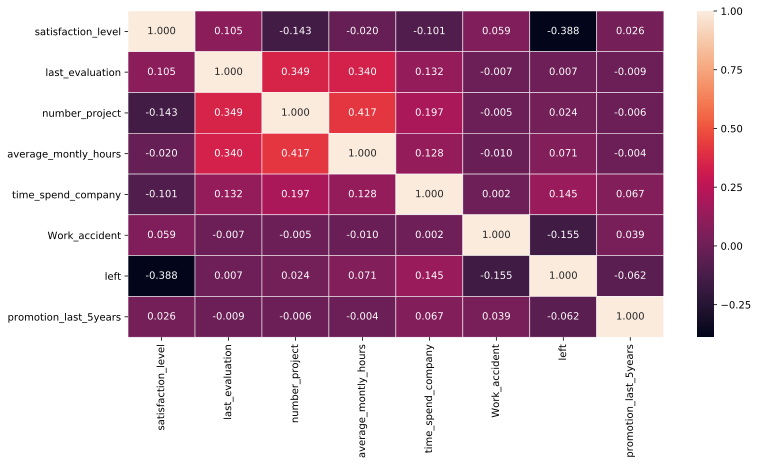

In [11]:
sns.heatmap(corr, annot=True, fmt=".3f", 
            linewidths=0.5);

Как видно, пары параметров ("average_montly_hours", "number_project") и ("left", "satisfaction_level") самые зависимые. И самые независимые это пара ("Work_accident", "time_spend_company").

("left", "satisfaction_level") имеют отрицательную корреляцию, что в общем-то понятно интуитивно, так как при малом уровне удовлетворенности разумно ожидать большее количество уходов работника.

### **4. Визуализировать несколько взаимосвязей между переменными.**

**4.1. Распределение среднего времени работы сотрудника за месяц в зависимости от департамента.**

In [12]:
hr_avg_hours = hr[['sales', 'average_montly_hours']].groupby('sales').mean()

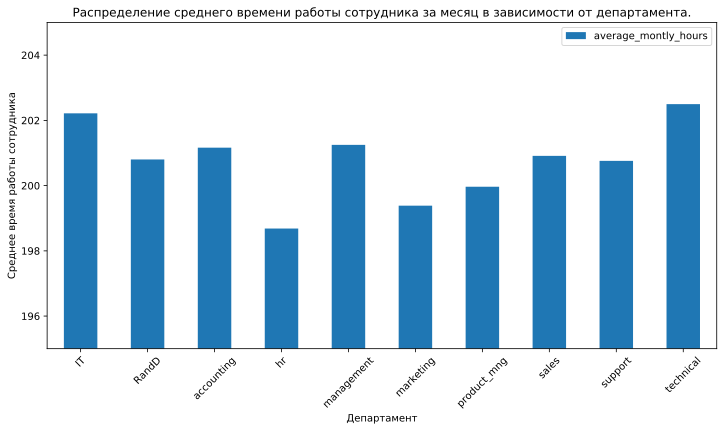

In [19]:
hr_avg_hours.plot(kind='bar', rot=45)
plt.title('Распределение среднего времени работы сотрудника за месяц в зависимости от департамента.')
plt.xlabel('Департамент')
plt.ylabel('Среднее время работы сотрудника')
plt.ylim(195, 205)
plt.legend()

Видно, что изменение относительно заметное, но в целом этот параметр для всех не сильно различный.

**4.2. Распределение уровня удовлетворенности в зависимости от количества проектов.**

Изобразим распределение уровня удовлетворенности в зависимости от количества проектов.

In [20]:
hr_sat= hr[['satisfaction_level', 'number_project']].groupby('number_project').mean()

Text(0,0.5,'Уровень удовлетворенности')

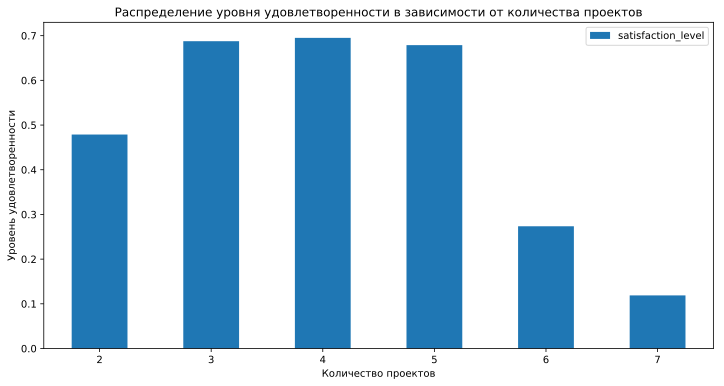

In [21]:
hr_sat.plot(kind='bar', rot=0)
plt.title('Распределение уровня удовлетворенности в зависимости от количества проектов')
plt.xlabel('Количество проектов')
plt.ylabel('Уровень удовлетворенности')

Удовлетворенность падает в зависимости от загруженности проектами.

**4.3. Распределение уровня удовлетворенности и среднее количество рабочих часов в месяц по департаментам.**

Изобразим уровень удовлетворенности и среднее количество рабочих часов в месяц по департаментам с помощью библиотеки plotly.

In [22]:
hr_avg = hr[['sales', 'average_montly_hours', 'satisfaction_level']].groupby('sales').mean()
hr_avg

,average_montly_hours,satisfaction_level
sales,,
IT,202.215974,0.618142
RandD,200.800508,0.619822
accounting,201.162973,0.582151
hr,198.684709,0.598809
management,201.249206,0.621349
marketing,199.385781,0.618601
product_mng,199.965632,0.619634
sales,200.911353,0.614447
support,200.758188,0.618300


In [23]:
trace = go.Scatter(
    x=hr_avg.index,
    y=hr_avg.satisfaction_level,
    mode = 'markers+text',
    text = hr_avg.index,
    marker = dict(
        size = 1/3*hr_avg.average_montly_hours,
        color = list(range(0,len(hr_avg.index.unique())))
    )
)

data = [trace]

layout = go.Layout(
    title = '',
    xaxis=dict(
        autorange=True,
        title='sales',
    ),
    yaxis=dict(
        autorange=True,
        title='satisfaction_level'
    ))
    
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Так как уровень average_montly_hours у всех департаментов примерно одинаковый, поэтому кружки одинакового размера.

**4.4. Распределение загруженности (average_montly_hours) работников в зависимости от количества проектов.**

Теперь посмотрим загруженность (average_montly_hours) работников в зависимости от количества проектов, над которыми они работают. Для того, чтобы рассмотреть каждый департамент воспользуемся библиотекой plotly и создадим интерактивную визуализацию по всем департаментам.

In [24]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Bar(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    #mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [25]:
sales_avg_hours = {}

In [26]:
for sales in hr.sales.unique():
    sales_avg_hours[sales] = hr[hr.sales == sales][['number_project', 'average_montly_hours']].groupby('number_project').mean()

In [27]:
plotly_dropdown_line_plots(sales_avg_hours, title = 'Распределение загруженности работников в зависимости от количества проектов.')

Видно, что загруженность растет с ростом количества проектов у работника.

### **5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

t-test позволяет сравнивать матожидания одной выборки с каким-либо конкретным числом или же с маотжиданием другой выборки.

**5.1. Проверим гипотезу, например, $H_0: M_{average\ montly\ hours} = 201$**

In [28]:
stats.ttest_1samp(hr['average_montly_hours'], 201)

Ttest_1sampResult(statistic=0.12343556484996877, pvalue=0.9017638497489203)

Так как p-value > 0.05, можно не отвергать данную гипотезу.

**5.2. Проверим гипотезу, например, $H_0: M_{IT\ average\ montly\ hours} = M_{hr\ average\ montly\ hours}$**

То есть наша гипотеза состоит в том, что среднее количество рабочих часов в месяц в IT-департаменте и в hr-департаменте одинаково. 

In [29]:
hr_IT = hr[hr['sales']=='IT']['average_montly_hours']
hr_hr = hr[hr['sales']=='hr']['average_montly_hours']

In [30]:
stats.ttest_ind(hr_IT, hr_hr)

Ttest_indResult(statistic=1.4997241638444898, pvalue=0.1338465912456547)

Так как p-value > 0.05, можно не отвергать данную гипотезу.

**5.3. Проверим гипотезу, например, $H_0: M_{IT\ 2\ average\ montly\ hours} = M_{IT\ 7\ average\ montly\ hours}$**

То есть наша гипотеза состоит в том, что среднее количество рабочих часов в месяц в IT-департаменте при работе над двумя проектами и при работе над 7-ю проектами одинаково. 

In [31]:
hr_IT_2 = hr[ (hr['sales']=='IT') & (hr['number_project']==2) ]['average_montly_hours']
hr_IT_7 = hr[ (hr['sales']=='IT') & (hr['number_project']==7) ]['average_montly_hours']

In [32]:
stats.ttest_ind(hr_IT_2, hr_IT_7)

Ttest_indResult(statistic=-14.617028658727467, pvalue=2.1441740069067593e-33)

Так как p-value крайне мал, можно отвергнуть данную гипотезу.

Действительно можно показать, что матожидания данных распределений совершенно различны.

In [33]:
hr_IT_2.mean(), hr_IT_7.mean()

(159.83516483516485, 291.8)

**5.4. Проверим гипотезу, например, $H_0: M_{IT\ sat\ level} = M_{sales\ sat\ level}$**

То есть наша гипотеза состоит в том, что средний уровень удовлетворенности в IT-департаменте равен такому же показателю в sales-департаменте. 

In [35]:
hr_IT_sat = hr[hr['sales']=='IT']['satisfaction_level']
hr_sales_sat = hr[hr['sales']=='sales']['satisfaction_level']

In [36]:
stats.ttest_ind(hr_IT_sat, hr_sales_sat)

Ttest_indResult(statistic=0.45438869322964254, pvalue=0.6495674716114355)

Так как p-value > 0.05, можно не отвергать данную гипотезу.

### **6. Рассчитать сколько работников работает в каждом департаменте.**

Рассчитаем это с помощью функции pandas сount() и визуализируем.

In [37]:
hr_count_by_pro = hr.groupby('sales').count()
hr_count_by_pro['count'] = hr_count_by_pro['satisfaction_level']
hr_count_by_pro = hr_count_by_pro['count']

Text(0,0.5,'Количество сотрудников')

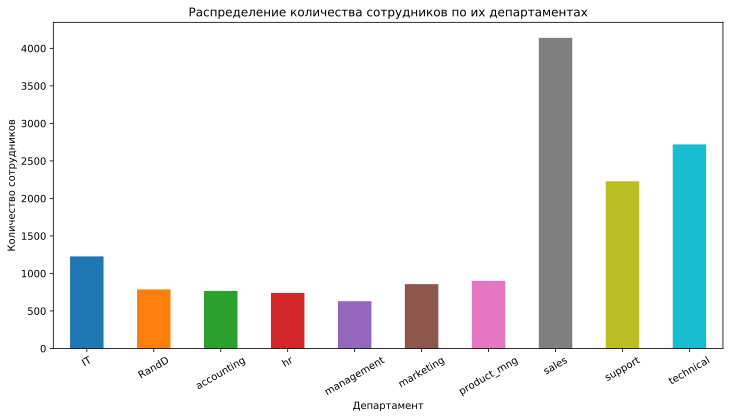

In [38]:
hr_count_by_pro.plot(kind='bar', rot=30)
plt.title('Распределение количества сотрудников по их департаментах')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')

Видно, что в продажах занято наибольшее количество людей.

### **7. Показать распределение сотрудников по зарплатам.**

In [39]:
hr_salary = hr.groupby('salary').count()
hr_salary['count'] = hr_salary['satisfaction_level']
hr_salary = hr_salary['count']

Text(0,0.5,'Количество сотрудников')

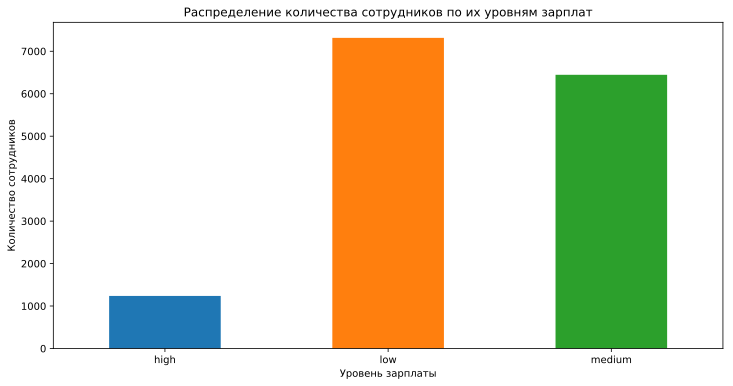

In [40]:
hr_salary.plot(kind='bar', rot=0)
plt.title('Распределение количества сотрудников по их уровням зарплат')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')

### **8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

Можно использовать библиотеку plotly для того, чтобы изобрать данное распределение более наглядно.

In [41]:
hr_low = hr[['sales', 'salary']][hr['salary'] == 'low'].groupby('sales').count()
hr_medium = hr[['sales', 'salary']][hr['salary'] == 'medium'].groupby('sales').count()
hr_high = hr[['sales', 'salary']][hr['salary'] == 'high'].groupby('sales').count()

In [42]:
trace0 = go.Bar(
    x=hr_low.index,
    y=hr_low['salary'],
    name='low',
    orientation = 'v'
)

trace1 = go.Bar(
    x=hr_medium.index,
    y=hr_medium['salary'],
    name='medium',
    orientation = 'v'
)

trace2 = go.Bar(
    x=hr_high.index,
    y=hr_high['salary'],
    name='high',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Распределение сотрудников по зарплатам совместно с департаментами'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Для большей чистоты кода, можно оформить в функцию. Создадим функцию plotly_bar_plot.

In [43]:
dfs = [hr_low, hr_medium, hr_high]
names = ['low', 'medium', 'high']

In [44]:
def plotly_bar_plot(dfs, names, title = ''):
    data = []
    i = 0
    for df in dfs:
        trace = go.Bar(
            x=dfs[i].index,
            y=dfs[i]['salary'],
            name=names[i],
            orientation = 'v')
        data.append(trace)
        i += 1
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [45]:
plotly_bar_plot(dfs, names, title = 'Распределение сотрудников по зарплатам совместно с департаментами')

Видно, что почти во всех департаментах большинство людей получает маленькую зарплату, но, например, в департаменте менеджмента и в департаменте эйчара большинство людей получает среднюю зарплату.

### **9. Сколько сотрудников покинули компанию.**

In [46]:
hr_left = hr[['left', 'sales']][hr['left'] == 1].groupby('sales').count()

Text(0,0.5,'Количество сотрудников, которые покинули компанию')

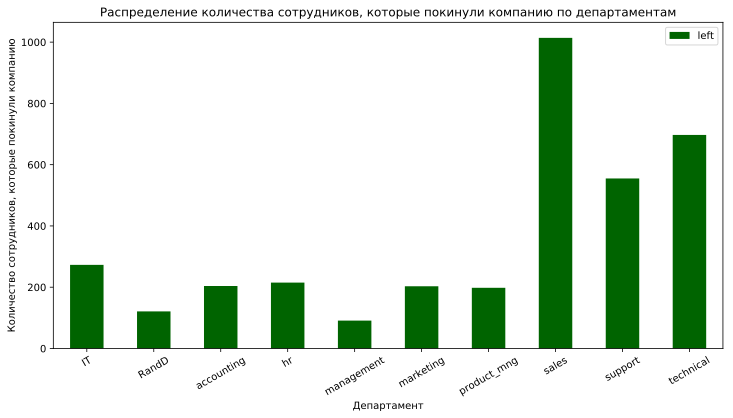

In [47]:
hr_left.plot(kind='bar', rot=30, color = ['darkgreen'])
plt.title('Распределение количества сотрудников, которые покинули компанию по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников, которые покинули компанию')

Можно теперь для наглядности изобразить сколько сотрудников покинули компанию в процентном соотношении.

In [48]:
hr_left = hr[['left', 'sales']][hr['left'] == 1].groupby('sales').count()
hr_all = hr[['left', 'sales']].groupby('sales').count()
hr_left_rel = hr_left/hr_all

Text(0,0.5,'Количество сотрудников, которые покинули компанию')

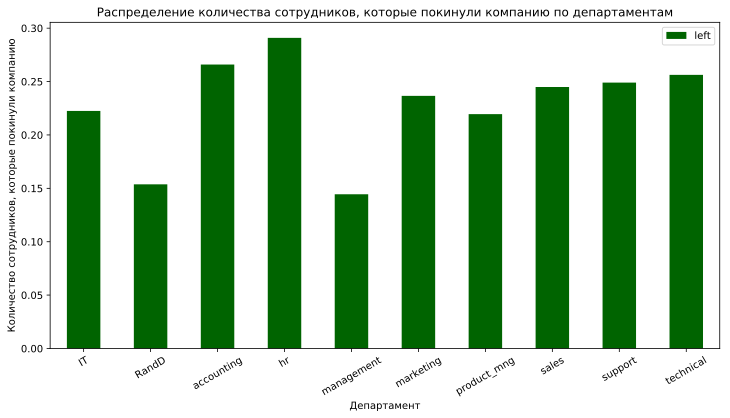

In [49]:
hr_left_rel.plot(kind='bar', rot=30, color = ['darkgreen'])
plt.title('Распределение количества сотрудников, которые покинули компанию по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников, которые покинули компанию')

Как видно, в процентном соотношение больше всего людей покидает hr-департамент. 

### **10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

**10.1. Проверим гипотезу о том, что уровень удовлетворенности одинаков у ушедших и у оставшихся сотрудников одинаково.**

In [50]:
hr_left_1_sat = hr[['satisfaction_level', 'left']][hr['left'] == 1]
hr_left_0_sat = hr[['satisfaction_level', 'left']][hr['left'] == 0]

In [51]:
stats.ttest_ind(hr_left_1_sat['satisfaction_level'], hr_left_0_sat['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

In [52]:
hr_left_1_sat['satisfaction_level'].mean()

0.44009801176140917

In [53]:
hr_left_0_sat['satisfaction_level'].mean()

0.666809590479516

Уровень удовлетворенности у ушедших заметно меньше.

**10.2. Проверим гипотезу о том, что уровень последней оценки работы у ушедших и у оставшихся сотрудников одинаково.**

In [58]:
hr_left_1_ev = hr[['last_evaluation', 'left']][hr['left'] == 1]
hr_left_0_ev = hr[['last_evaluation', 'left']][hr['left'] == 0]

In [59]:
stats.ttest_ind(hr_left_1_ev['last_evaluation'], hr_left_0_ev['last_evaluation'])

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

Видно, что p-value > 0.05, то есть эту гипотезу можно не отвергать. 

Сравним матожидания этих выборок.

In [60]:
hr_left_1_ev['last_evaluation'].mean(), hr_left_0_ev['last_evaluation'].mean()

(0.7181125735088183, 0.7154733986699274)

Видно, что эти показатели действительно очень близки.

**10.3. Проверим гипотезу о том, что время работы в компании у ушедших и у оставшихся сотрудников одинаково.**

In [61]:
hr_left_1_time = hr[['time_spend_company', 'left']][hr['left'] == 1]
hr_left_0_time = hr[['time_spend_company', 'left']][hr['left'] == 0]

In [62]:
stats.ttest_ind(hr_left_0_time['time_spend_company'], hr_left_1_time['time_spend_company'])

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

In [63]:
hr_left_1_time['time_spend_company'].mean()

3.876505180621675

In [64]:
hr_left_0_time['time_spend_company'].mean()

3.3800315015750786

Видно, что ушедшие в среднем больше времени провели в компании.

**10.4. Проверим гипотезу о том, что среднее количество повышения в течение 5 лет у ушедших и у оставшихся сотрудников одинаково.**

In [65]:
hr_left_1_pr = hr[['promotion_last_5years', 'left']][hr['left'] == 1]
hr_left_0_pr = hr[['promotion_last_5years', 'left']][hr['left'] == 0]

In [66]:
hr_left_1_pr['promotion_last_5years'].mean()

0.005320638476617194

In [67]:
hr_left_0_pr['promotion_last_5years'].mean()

0.026251312565628283

In [68]:
stats.ttest_ind(hr_left_1_pr['promotion_last_5years'], hr_left_0_pr['promotion_last_5years'])

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

**10.5. Проверим гипотезу о том, что среднее количество проектов у ушедших и у оставшихся сотрудников одинаково.**

In [69]:
hr_left_1_np= hr[['number_project', 'left']][hr['left'] == 1]
hr_left_0_np = hr[['number_project', 'left']][hr['left'] == 0]

In [70]:
stats.ttest_ind(hr_left_1_np['number_project'], hr_left_0_np['number_project'])

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

In [71]:
hr_left_1_np['number_project'].mean()

3.8555026603192384

In [72]:
hr_left_0_np['number_project'].mean()

3.786664333216661

Видно, что у ушедших в среднем больше количества проектов.

**10.6. Проверим гипотезу о том, что среднее время работы в месяц у ушедших и у оставшихся сотрудников одинаково.**

In [73]:
hr_left_1_amh= hr[['average_montly_hours', 'left']][hr['left'] == 1]
hr_left_0_amh = hr[['average_montly_hours', 'left']][hr['left'] == 0]

In [74]:
stats.ttest_ind(hr_left_1_amh['average_montly_hours'], hr_left_0_amh['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

In [75]:
hr_left_1_amh['average_montly_hours'].mean()

207.41921030523662

In [76]:
hr_left_0_amh['average_montly_hours'].mean()

199.0602030101505

Видно, что у ушедших в среднем больше рабочих часов.

**10.7. Проверим гипотезу о том, что наличие инцидента на рабочем месте у ушедших и у оставшихся сотрудников одинаково.**

In [78]:
hr_left_1_wa= hr[['Work_accident', 'left']][hr['left'] == 1]
hr_left_0_wa = hr[['Work_accident', 'left']][hr['left'] == 0]

In [79]:
stats.ttest_ind(hr_left_1_wa['Work_accident'], hr_left_0_wa['Work_accident'])

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

Видно, что p-value < 0.05, то есть эту гипотезу можно отвергнуть. 

In [80]:
hr_left_1_wa['Work_accident'].mean()

0.047325679081489776

In [81]:
hr_left_0_wa['Work_accident'].mean()

0.17500875043752187

Видно, что у оставшихся инциндентов на рабочем месте было больше.

**10.8. Проверим гипотезу о том, что в процентном соотношении среди покинувших компанию больше людей с маленькой зарплатой и меньше с большой, чем у оставшихся.**

In [82]:
hr_left_1_sal= hr[['salary', 'left']][hr['left'] == 1]
hr_left_0_sal = hr[['salary', 'left']][hr['left'] == 0]

In [83]:
hr_left_1_sal = (hr_left_1_sal.groupby('salary').count()/hr_left_1_sal.count())['left']
hr_left_1_sal

salary
high      0.022963
low       0.608233
medium    0.368804
Name: left, dtype: float64

In [86]:
hr_left_0_sal = (hr_left_0_sal.groupby('salary').count()/hr_left_0_sal.count())['left']
hr_left_0_sal

salary
high      0.101068
low       0.450123
medium    0.448810
Name: left, dtype: float64

Таким образом, действительно, люди, которые ушли с работы с бОльшей вероятностью получали меньшую зарплату, и большую зарплату с меньшей вероятностью.

### **В конечном итоге, можно сделать такие выводы, о том, почему люди покидают компанию. Перечислим признаки, которые положительно влияют на уход из компании:** 
- Уменьшение уровня удовлетворенности.
- Длительное время работы в компании.
- Отсутствие повышений.
- Загруженность проектами.
- Загруженность по времени в месяц.
- Маленькая зарплата.